In [1]:
import scimap as sm
import pandas as pd
import sys
import os
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)
import anndata
adata = anndata.read_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")
adata.obs

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



,SampleID,Region,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,...,spatial_kmeans_knn5_k14,spatial_kmeans_knn30_k8,spatial_kmeans_knn30_k10,spatial_kmeans_knn30_k12,spatial_kmeans_knn30_k11,spatial_kmeans_knn100_k8,spatial_kmeans_knn100_k10,spatial_kmeans_knn100_k12,niche_knn30k11,PatientID_Atlas
0,HV196B,Epi,4063.439560,117.074176,364.0,22.370634,21.038466,0.339932,0.943005,0.659420,...,12,6,1,2,1,7,8,11,Spinous,CP-6
1,HV196B,Epi,3906.382114,121.085366,246.0,20.441847,17.120427,0.546409,0.907749,0.615000,...,12,6,1,2,1,7,0,11,Spinous,CP-6
2,HV196B,Epi,4046.433333,119.300000,150.0,16.610911,12.183316,0.679741,0.887574,0.721154,...,12,6,1,2,1,7,8,11,Spinous,CP-6
3,HV196B,Epi,3925.083102,125.171745,722.0,36.032598,26.241478,0.685290,0.918575,0.705767,...,12,6,1,2,6,7,0,11,Crevicular,CP-6
4,HV196B,Epi,3950.053150,129.606299,508.0,27.802349,25.184052,0.423653,0.862479,0.627160,...,12,6,9,2,6,7,0,11,Crevicular,CP-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370783,HV195A1,Epi,3129.127196,3308.111736,1423.0,51.882097,36.168967,0.716937,0.918065,0.748947,...,8,1,1,11,1,7,8,0,Spinous,HC-11
370784,HV195A1,Epi,2959.323333,3307.864444,900.0,37.111385,31.354542,0.534961,0.955414,0.802139,...,2,1,1,11,1,7,8,0,Spinous,HC-11
370785,HV195A1,Epi,2994.039424,3311.975739,1319.0,50.436389,35.218756,0.715824,0.913435,0.769096,...,2,1,1,11,1,7,8,0,Spinous,HC-11
370786,HV195A1,Epi,3047.255569,3311.067995,1706.0,64.079403,35.168771,0.835933,0.948305,0.880289,...,2,1,1,11,1,7,8,0,Spinous,HC-11


In [ ]:
adata.obs['PatientID_Atlas']=adata.obs['PatientID']
# Ensure 'PatientID_Atlas' is a string type
adata.obs['PatientID_Atlas'] = adata.obs['PatientID_Atlas'].astype(str)

# Define the replacement dictionary
replacement_dict = {
'HV171' : 'H-1',
'HV180' : 'H-2',
'HV189'	: 'H-3',
'HV191' : 'H-4',
'HV203' : 'H-5',
'HV207' : 'H-6',
'HV220' : 'H-7',
'HV190' : 'H-10',
'HV195' : 'H-11',
'HV137' : 'P-1',
'HV140'	: 'P-2',
'HV154' : 'P-3',
'HV160' : 'P-4',
'TM327' : 'P-5',
'HV196' : 'P-6',
'HV204' : 'P-7',
'HV214' : 'P-8',
'HV219' : 'P-9',
}

# Replace only the specified categories in 'T_leiden2'
adata.obs['PatientID_Atlas'] = adata.obs['PatientID_Atlas'].astype(str)  # Ensure it's string
adata.obs['PatientID_Atlas'] = adata.obs['PatientID_Atlas'].replace(replacement_dict)

# Check the unique values in 'T_leiden2' to confirm
print(adata.obs['PatientID_Atlas'].unique())

In [11]:
# Replace 'column_name' with the name of your column
unique_categories = adata.obs['spatial_cluster'].unique().tolist()
print(unique_categories)

['Ep.k', 'Lang', 'Fib.Thy1(-)', 'Ep.sp', 'Neut.IE', 'Fib.Thy1(+)', 'Ep.prol', 'Ep.b-pb', 'ECM.Vim(+)', 'Neut.S100a8-9(-)', 'APCmyel.perivasc', 'Ep.crev', 'APC.myel', 'Mast', 'T.cyt', 'Plasma', 'T.APCmyel.mix', 'En.aSMA(-)', 'En.Im.mix', 'En.HLA-DR(+)', 'Neut.BV', 'Thy1.CD45.cell', 'T.IE', 'Fib.HLA-DR(+)', 'En.HLA-DR(-)', 'SMC.HLA-DR(+)', 'Neut.S100a8-9.CT', 'Tcyt.B.mix', 'SMC.HLA-DR(-)', 'Pl.T.mix', 'Unclear', 'T.h', 'Th.B.mix', 'B']


/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap/lib/python3.8/site-packages/scanpy/tools/_dendrogram.py:161: ImplicitModificationWarning:

Trying to modify attribute `._uns` of view, initializing view as actual.

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



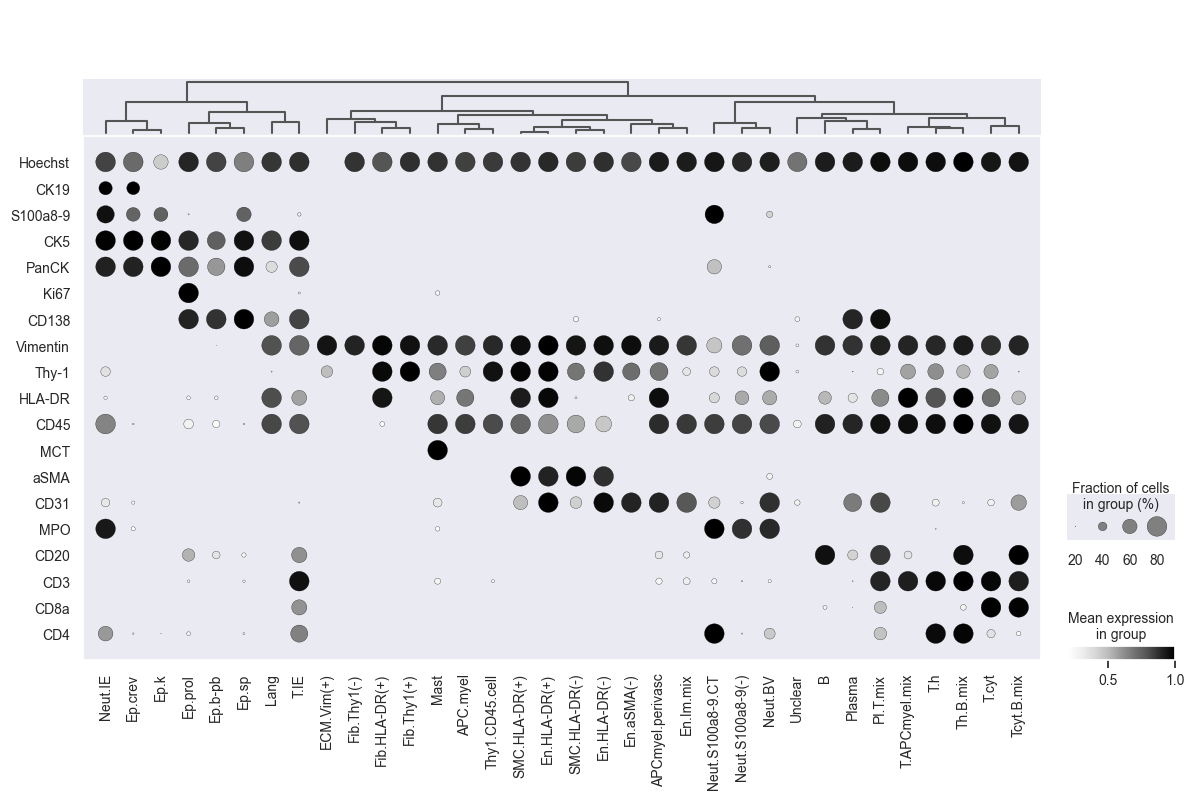

In [22]:
import scanpy as sc

# Define the clusters you want to include
clusters_of_interest = ['Ep.k', 'Lang', 'Fib.Thy1(-)', 'Ep.sp', 'Neut.IE', 'Fib.Thy1(+)', 'Ep.prol', 'Ep.b-pb', 'ECM.Vim(+)', 'Neut.S100a8-9(-)', 'APCmyel.perivasc', 'Ep.crev', 'APC.myel', 'Mast', 'T.cyt', 'Plasma', 'T.APCmyel.mix', 'En.aSMA(-)', 'En.Im.mix', 'En.HLA-DR(+)', 'Neut.BV', 'Thy1.CD45.cell', 'T.IE', 'Fib.HLA-DR(+)', 'En.HLA-DR(-)', 'SMC.HLA-DR(+)', 'Neut.S100a8-9.CT', 'Tcyt.B.mix', 'SMC.HLA-DR(-)', 'Pl.T.mix', 'Unclear', 'T.h', 'Th.B.mix', 'B']

# Filter the AnnData object to include only these clusters
adata_subset = adata[adata.obs['spatial_cluster'].isin(clusters_of_interest)]

# Recompute the dendrogram for the subsetted data
sc.tl.dendrogram(adata_subset, groupby='spatial_cluster')

# Define the order of genes you want to visualize
ordered_genes = ['Hoechst', 'CK19', 'S100a8-9', 'CK5', 'PanCK', 'Ki67', 'CD138', 'Vimentin', 'Thy-1', 'HLA-DR', 'CD45', 'MCT', 'aSMA', 'CD31', 'MPO', 'CD20', 'CD3', 'CD8a', 'CD4',]  # replace with the actual gene names and their order

# Example with sc.pl.matrixplot for ordered genes
sc.pl.dotplot(adata_subset, var_names=ordered_genes, groupby='spatial_cluster', 
                 dendrogram=True, use_raw=False, cmap="Greys", standard_scale='var', swap_axes=True, vmin=0.2, dot_max=0.8, dot_min=0.2)


In [25]:
import scimap as sm

image_path1 = '/data/vasileiosionat2/IBEX_FINAL/E)Processed_files/HV137B1.tif'
seg_mask_path1 = '/data/vasileiosionat2/IBEX_FINAL/Cellprofiler_Outputs/Masks/HV137B1_0.tiff'
   
#Let's visualize the subpoputions (white points) superimposed to the different channels and to the segmentation mask
sm.pl.image_viewer(image_path1,
                   adata,
                   seg_mask=seg_mask_path1,
                   subset='HV137B1_HV137B1_0',
                   overlay='spatial_cluster',
                   point_size=20)



(python:3856129): dconf-WARNING **: 18:34:24.156: failed to commit changes to dconf: Could not connect: Connection refused

(python:3856129): dconf-WARNING **: 18:34:24.156: failed to commit changes to dconf: Could not connect: Connection refused


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import anndata as ad
from matplotlib.colors import ListedColormap

In [31]:
# Load the segmentation mask
segmentation_mask = io.imread('/data/vasileiosionat2/IBEX_FINAL/Cellprofiler_Outputs/Masks/HV137B1_0.tiff')  # Replace with your file path

# Subset `adata` for the target `SampleID`
sample_id = "HV137B1_HV137B1_0"  # Replace with your target SampleID
adata_subset = adata[adata.obs['SampleID'] == sample_id] 

# Map cluster IDs to the segmentation mask
cluster_map = adata_subset.obs['lvl2.5_spatial_cluster'].to_dict()  # Replace 'cluster_column' with the column name for clusters
colored_mask = np.zeros_like(segmentation_mask, dtype=np.float32)

for cell_id, cluster_id in cluster_map.items():
    colored_mask[segmentation_mask == cell_id] = cluster_id


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import anndata as ad
from matplotlib.colors import ListedColormap


In [50]:
# Load the segmentation mask (replace with actual file path)
segmentation_mask = io.imread('/data/vasileiosionat2/IBEX_FINAL/Cellprofiler_Outputs/Masks/HV137B1_0.tiff')

In [51]:
sample_id = "HV137B1"  # Replace with your target SampleID
adata_subset = adata[adata.obs['SampleID'] == sample_id]  # Adjust 'SampleID' column name if needed

In [52]:
if adata_subset.n_obs == 0:
    print(f"No data found for SampleID {sample_id}.")
else:
    # Proceed with the rest of the code if data is available
    print(f"Data found for SampleID {sample_id}.")
    pass


Data found for SampleID HV137B1.


In [53]:
# Ensure 'lvl1_spatial_cluster' is categorical and get cluster mapping
adata_subset.obs['lvl1_spatial_cluster'] = adata_subset.obs['lvl1_spatial_cluster'].astype('category')

/tmp/ipykernel_3856129/4029885757.py:2: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [54]:
# Map cell IDs to cluster labels
cluster_map = adata_subset.obs['lvl1_spatial_cluster'].to_dict()  # cell_id: cluster_label

# Map cluster labels to numeric IDs for coloring
cluster_label_to_numeric = {label: idx for idx, label in enumerate(adata_subset.obs['lvl1_spatial_cluster'].cat.categories)}

In [61]:
# Check the first few rows of the obs dataframe to understand its structure
print(adata_subset.obs.head())

       SampleID Region   X_centroid  Y_centroid    Area  MajorAxisLength  \
212064  HV137B1    Epi   763.020202  317.010101    99.0        12.312841   
212065  HV137B1    Epi  1007.409884  328.098837   344.0        26.024875   
212066  HV137B1    Epi  1036.727184  325.768932  1030.0        42.835466   
212067  HV137B1    Epi  1121.123389  325.302026   543.0        33.344114   
212068  HV137B1    Epi   879.600000  338.800000   270.0        22.291392   

        MinorAxisLength  Eccentricity  Solidity    Extent  ...  \
212064        10.612644      0.507050  0.933962  0.750000  ...   
212065        17.839103      0.728107  0.922252  0.670565  ...   
212066        33.460164      0.624366  0.871404  0.553169  ...   
212067        21.680739      0.759753  0.839258  0.625576  ...   
212068        19.539451      0.481316  0.815710  0.490018  ...   

        spatial_kmeans_knn5_k14  spatial_kmeans_knn30_k8  \
212064                       12                        6   
212065                    

In [58]:
# Add a new 'cell_index' column to the 'obs' DataFrame of the AnnData object
adata_subset.obs['cell_index'] = np.arange(1, len(adata_subset) + 1)

In [62]:
# Check the first few rows of the obs dataframe to understand its structure
print(adata_subset.obs.head(1000))

       SampleID Region   X_centroid  Y_centroid    Area  MajorAxisLength  \
212064  HV137B1    Epi   763.020202  317.010101    99.0        12.312841   
212065  HV137B1    Epi  1007.409884  328.098837   344.0        26.024875   
212066  HV137B1    Epi  1036.727184  325.768932  1030.0        42.835466   
212067  HV137B1    Epi  1121.123389  325.302026   543.0        33.344114   
212068  HV137B1    Epi   879.600000  338.800000   270.0        22.291392   
...         ...    ...          ...         ...     ...              ...   
213059  HV137B1     CT   860.522417  990.510721   513.0        32.193189   
213060  HV137B1    Epi  2845.602539  985.539062  1024.0        41.773474   
213061  HV137B1     CT   769.562284  990.197232   578.0        41.936022   
213062  HV137B1     CT  1383.239554  995.739554   718.0        37.449038   
213063  HV137B1    Epi  1499.324526  991.269385  1741.0        55.943763   

        MinorAxisLength  Eccentricity  Solidity    Extent  ...  \
212064        10.6126

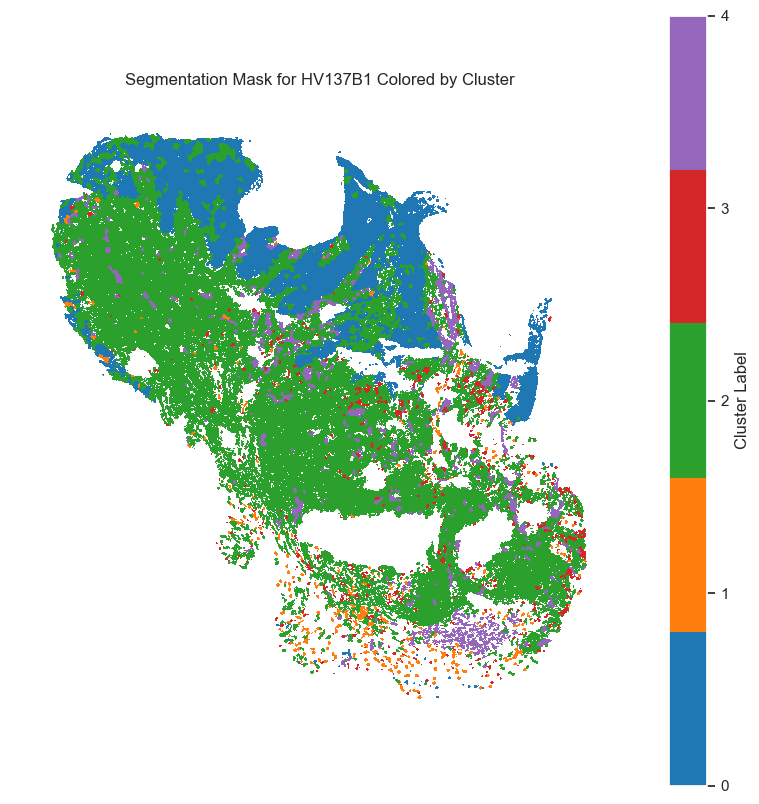

In [65]:
# Create a colormap for the unique clusters (ensure you have enough colors for all clusters)
unique_clusters = adata_subset.obs['lvl1_spatial_cluster'].cat.categories
colormap = ListedColormap(plt.cm.tab10.colors[:len(unique_clusters)])

# Initialize the colored mask with white (background color)
colored_mask = np.ones_like(segmentation_mask, dtype=np.float32) * np.nan  # White for the background

# Loop through the unique cell IDs in the segmentation mask
for cell_id in np.unique(segmentation_mask):
    if cell_id == 0:
        continue  # Skip the background cell ID (usually 0)
    
    # Get the corresponding row from `adata_subset`
    row = adata_subset.obs[adata_subset.obs['cell_index'] == cell_id]
    
    if not row.empty:
        # Get the cluster label for this cell
        cluster_label = row['lvl1_spatial_cluster'].values[0]
        
        # Map the cluster label to the corresponding color index (numeric ID)
        cluster_id = np.where(unique_clusters == cluster_label)[0][0]
        
        # Apply the cluster_id to the corresponding positions in the colored_mask
        colored_mask[segmentation_mask == cell_id] = cluster_id

# Plot the colored segmentation mask
plt.figure(figsize=(10, 10))
plt.imshow(colored_mask, cmap=colormap, interpolation='nearest')
plt.colorbar(ticks=np.arange(len(unique_clusters)), label='Cluster Label')
plt.axis('off')
plt.title(f'Segmentation Mask for {sample_id} Colored by Cluster')

# Show the plot
plt.show()

# Optionally save the colored segmentation mask
# plt.imsave(f'segmentation_mask_{sample_id}_colored_by_cluster_white_background.tiff', colored_mask, cmap=colormap)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import io

# Load the segmentation mask
segmentation_mask = io.imread('/data/vasileiosionat2/IBEX_FINAL/Cellprofiler_Outputs/Masks/HV137B1_0.tiff')

# Specify the crop coordinates
x_min, x_max = 1902, 2550  # X range (columns)
y_min, y_max = 1260, 1836  # Y range (rows)

# Crop the segmentation mask
cropped_segmentation_mask = segmentation_mask[y_min:y_max, x_min:x_max]

# Specify the sample ID
sample_id = "HV137B1"
adata_subset = adata[adata.obs['SampleID'] == sample_id]

# Map cell IDs to cluster labels
cluster_map = adata_subset.obs['lvl1_spatial_cluster'].to_dict()

# Map cluster labels to numeric IDs for coloring
cluster_label_to_numeric = {
    label: idx for idx, label in enumerate(adata_subset.obs['lvl1_spatial_cluster'].cat.categories)
}

# Add a new 'cell_index' column to the 'obs' DataFrame
adata_subset.obs['cell_index'] = np.arange(1, len(adata_subset) + 1)

# Define a custom colormap for the clusters
cluster_colors = {
    'Immune': 'green',
    'Fibroblast': 'blue',
    'Epithelial': 'yellow',
    'Vascular': 'red',
    'Other': 'grey'
}
unique_clusters = list(cluster_colors.keys())
colormap = ListedColormap([cluster_colors[cluster] for cluster in unique_clusters])

# Initialize the colored mask
colored_mask = np.ones_like(cropped_segmentation_mask, dtype=np.float32) * np.nan  # White background

# Populate the cropped colored mask based on cluster labels
for cell_id in np.unique(cropped_segmentation_mask):
    if cell_id == 0:
        continue  # Skip background
    
    # Get the corresponding row in `adata_subset`
    row = adata_subset.obs[adata_subset.obs['cell_index'] == cell_id]
    if not row.empty:
        # Map the cluster label to the corresponding numeric ID
        cluster_label = row['lvl1_spatial_cluster'].values[0]
        cluster_id = cluster_label_to_numeric[cluster_label]
        colored_mask[cropped_segmentation_mask == cell_id] = cluster_id

# Plot the cropped segmentation mask
plt.figure(figsize=(12, 12))
plt.imshow(colored_mask, cmap=colormap, interpolation='nearest')
plt.colorbar(
    ticks=np.arange(len(unique_clusters)),
    label='Cluster Label',
    boundaries=np.arange(-0.5, len(unique_clusters), 1),
)
plt.axis('off')
plt.title(f'Cropped Segmentation Mask for {sample_id} Colored by Cluster')

# Add contours to highlight cell boundaries in the cropped region
for cell_id in np.unique(cropped_segmentation_mask):
    if cell_id == 0:
        continue  # Skip background
    # Create a binary mask for each cell
    binary_mask = cropped_segmentation_mask == cell_id
    contours = plt.contour(
        binary_mask,
        levels=[0.5],
        colors='k',  # Black contours
        linewidths=0.5,
    )

plt.show()



NameError: name 'adata' is not defined

In [3]:
adata.obs['lvl2.5_spatial_cluster'].unique().tolist()

['Keratin',
 'Langerhans',
 'Fibroblast',
 'Spinous',
 'Neutrophil',
 'Proliferating',
 'Basal-Parabasal',
 'Other',
 'APC-myeloid',
 'Crevicular',
 'Mast',
 'T',
 'Plasma',
 'T-APC mix',
 'Endothelial',
 'SMC',
 'Plasma-T mix',
 'B']

In [5]:
adata.obs['lvl2.5_spatial_cluster'] = adata.obs['lvl2.5_spatial_cluster'].astype(str)
# Convert the 'niche_cc14' column to categorical
adata.obs['lvl2.5_spatial_cluster'] = pd.Categorical(adata.obs['lvl2.5_spatial_cluster'])

# Define the replacement dictionary
replacement_dict = {
    'Proliferating': 'Basal-Parabasal',
    'Langerhans': 'APC-myeloid',
    'T-APC mix': 'Lymphoid mix',
    'Plasma-T mix': 'Lymphoid mix'
}


# Replace values in the 'niche_cc14' column
adata.obs['lvl2.5_spatial_cluster'] = adata.obs['lvl2.5_spatial_cluster'].replace(replacement_dict)
print(adata.obs['lvl2.5_spatial_cluster'].unique())

['Keratin', 'APC-myeloid', 'Fibroblast', 'Spinous', 'Neutrophil', ..., 'Plasma', 'Lymphoid mix', 'Endothelial', 'SMC', 'B']
Length: 15
Categories (15, object): ['APC-myeloid', 'B', 'Basal-Parabasal', 'Crevicular', ..., 'SMC', 'Spinous', 'T', 'Lymphoid mix']


In [6]:
adata.obs['lvl2.5_spatial_cluster'].unique().tolist()

['Keratin',
 'APC-myeloid',
 'Fibroblast',
 'Spinous',
 'Neutrophil',
 'Basal-Parabasal',
 'Other',
 'Crevicular',
 'Mast',
 'T',
 'Plasma',
 'Lymphoid mix',
 'Endothelial',
 'SMC',
 'B']

In [3]:
adata.obs['spatial_cluster'].unique().tolist()

['Ep.k',
 'Lang',
 'Fib.Thy1(-)',
 'Ep.sp',
 'Neut.IE',
 'Fib.Thy1(+)',
 'Ep.prol',
 'Ep.b-pb',
 'ECM.Vim(+)',
 'Neut.S100a8-9(-)',
 'APCmyel.perivasc',
 'Ep.crev',
 'APC.myel',
 'Mast',
 'T.cyt',
 'Plasma',
 'T.APCmyel.mix',
 'En.aSMA(-)',
 'En.Im.mix',
 'En.HLA-DR(+)',
 'Neut.BV',
 'Thy1.CD45.cell',
 'T.IE',
 'Fib.HLA-DR(+)',
 'En.HLA-DR(-)',
 'PB',
 'SMC.HLA-DR(+)',
 'Neut.S100a8-9.CT',
 'Tcyt.B.mix',
 'SMC.HLA-DR(-)',
 'Pl.T.mix',
 'Unclear',
 'T.h',
 'Th.B.mix',
 'B']

In [4]:
adata.obs['lvl4_spatial_cluster'] = adata.obs['spatial_cluster'].copy()

In [5]:
adata.obs['lvl4_spatial_cluster'].unique().tolist()

['Ep.k',
 'Lang',
 'Fib.Thy1(-)',
 'Ep.sp',
 'Neut.IE',
 'Fib.Thy1(+)',
 'Ep.prol',
 'Ep.b-pb',
 'ECM.Vim(+)',
 'Neut.S100a8-9(-)',
 'APCmyel.perivasc',
 'Ep.crev',
 'APC.myel',
 'Mast',
 'T.cyt',
 'Plasma',
 'T.APCmyel.mix',
 'En.aSMA(-)',
 'En.Im.mix',
 'En.HLA-DR(+)',
 'Neut.BV',
 'Thy1.CD45.cell',
 'T.IE',
 'Fib.HLA-DR(+)',
 'En.HLA-DR(-)',
 'PB',
 'SMC.HLA-DR(+)',
 'Neut.S100a8-9.CT',
 'Tcyt.B.mix',
 'SMC.HLA-DR(-)',
 'Pl.T.mix',
 'Unclear',
 'T.h',
 'Th.B.mix',
 'B']

In [6]:
#Modification 2025_03_03
adata.obs['lvl4_spatial_cluster'] = adata.obs['lvl4_spatial_cluster'].astype(str)
# Convert the 'niche_cc14' column to categorical
adata.obs['lvl4_spatial_cluster'] = pd.Categorical(adata.obs['lvl4_spatial_cluster'])

# Define the replacement dictionary
replacement_dict = {
    'Fib.Thy1(-)': 'Fib',
    'Fib.Thy1(+)': 'Fib',
    'Fib.HLA-DR(+)': 'Fib',
    'ECM.Vim(+)': 'Unclear',
    'APCmyel.perivasc': 'APC.BV',
    'APC.myel': 'APC',
    'T.APCmyel.mix': 'T.APC.mix',
    'En.aSMA(-)': 'VEC',
    'En.HLA-DR(+)': 'VEC',
    'En.HLA-DR(-)': 'VEC',
    'SMC.HLA-DR(+)' : 'SMC',
    'SMC.HLA-DR(-)' : 'SMC'   
}


# Replace values in the 'niche_cc14' column
adata.obs['lvl4_spatial_cluster'] = adata.obs['lvl4_spatial_cluster'].replace(replacement_dict)
print(adata.obs['lvl4_spatial_cluster'].unique())

['Ep.k', 'Lang', 'Fib', 'Ep.sp', 'Neut.IE', ..., 'Tcyt.B.mix', 'Pl.T.mix', 'T.h', 'Th.B.mix', 'B']
Length: 29
Categories (29, object): ['APC', 'APC.BV', 'B', 'En.Im.mix', ..., 'Tcyt.B.mix', 'Th.B.mix', 'Thy1.CD45.cell', 'Unclear']


In [7]:
adata.obs['lvl4_spatial_cluster'].unique().tolist()

['Ep.k',
 'Lang',
 'Fib',
 'Ep.sp',
 'Neut.IE',
 'Ep.prol',
 'Ep.b-pb',
 'Unclear',
 'Neut.S100a8-9(-)',
 'APC.BV',
 'Ep.crev',
 'APC',
 'Mast',
 'T.cyt',
 'Plasma',
 'T.APC.mix',
 'VEC',
 'En.Im.mix',
 'Neut.BV',
 'Thy1.CD45.cell',
 'T.IE',
 'PB',
 'SMC',
 'Neut.S100a8-9.CT',
 'Tcyt.B.mix',
 'Pl.T.mix',
 'T.h',
 'Th.B.mix',
 'B']

In [8]:
#Modification 2025_03_03
adata.obs['lvl4_spatial_cluster'] = adata.obs['lvl4_spatial_cluster'].astype(str)
# Convert the 'niche_cc14' column to categorical
adata.obs['lvl4_spatial_cluster'] = pd.Categorical(adata.obs['lvl4_spatial_cluster'])

# Define the replacement dictionary
replacement_dict = {
    'Ep.k': 'Ep.or.k',
    'Ep.sp': 'Ep.or.sp',
    'Ep.b-pb': 'Ep.or.b-pb',
    'Ep.crev': 'Ep.TA',
}


# Replace values in the 'niche_cc14' column
adata.obs['lvl4_spatial_cluster'] = adata.obs['lvl4_spatial_cluster'].replace(replacement_dict)
print(adata.obs['lvl4_spatial_cluster'].unique())

['Ep.or.k', 'Lang', 'Fib', 'Ep.or.sp', 'Neut.IE', ..., 'Tcyt.B.mix', 'Pl.T.mix', 'T.h', 'Th.B.mix', 'B']
Length: 29
Categories (29, object): ['APC', 'APC.BV', 'B', 'En.Im.mix', ..., 'Th.B.mix', 'Thy1.CD45.cell', 'Unclear', 'VEC']


In [9]:
adata.obs['lvl4_spatial_cluster'].unique().tolist()

['Ep.or.k',
 'Lang',
 'Fib',
 'Ep.or.sp',
 'Neut.IE',
 'Ep.prol',
 'Ep.or.b-pb',
 'Unclear',
 'Neut.S100a8-9(-)',
 'APC.BV',
 'Ep.TA',
 'APC',
 'Mast',
 'T.cyt',
 'Plasma',
 'T.APC.mix',
 'VEC',
 'En.Im.mix',
 'Neut.BV',
 'Thy1.CD45.cell',
 'T.IE',
 'PB',
 'SMC',
 'Neut.S100a8-9.CT',
 'Tcyt.B.mix',
 'Pl.T.mix',
 'T.h',
 'Th.B.mix',
 'B']

In [ ]:
adata.obs['niche_knn30k11_merged'] = adata.obs['niche_knn30k11'].copy()
import scanpy as sc

# Define the replacement dictionary
replacement_dict = {
    'Parabasal':'Oral Epi',
    'Crevicular': 'T.A. Epi',
    'Basal-Parabasal' : 'Epi-CT interface',
    'Spinous': 'Oral Epi',
}

# Replace values in the 'niche_knn30k11' column
adata.obs['niche_knn30k11_merged'] = adata.obs['niche_knn30k11_merged'].replace(replacement_dict)

# Print unique values after replacement
print(adata.obs['niche_knn30k11_merged'].unique().tolist())


In [10]:
adata.write_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")